# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)

### Task 1.1. (1 point)

Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).

1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf

2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

## 1. Scholkopf et al.

1. Separating surface -  hyperplane(using feature mapping $\Phi(x)$) 
* The decision function is $sgn((w \cdot \Phi(x)) - \rho)$, $-1$ corresponds to outliers.
$$
\min \frac{1}{2} ||w||^2 + \frac{1}{\nu m} \sum_{i=1}^m \xi_i - \rho, \\ (w \cdot \Phi(x_i)) \ge \rho - \xi_i, \ \xi_i \ge 0
$$
($\xi_i$ are slack variables, $\nu$ regulates the fraction of outliers admitted by our model)

## 2. Tax et al.
1. Separating surface - a hypersphere with center $a$ and radius $R$.
* The decision function is $sgn(R - ||x_i - a||)$,  $-1$ corresponds to outliers.:
$$
\min R^2 + C \sum_{i=1}^m \xi_i, \\ ||x_i - a||^2 \le R^2 + \xi_i, \ \xi_i \ge 0
$$
($C$ is a trade-off parameter, $\xi_i$ are slack variables)

## Main difference is in type of the separating surface. 

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [2]:
# impurity estimation on test data
contamination = test_y.mean()

In [3]:
contamination

0.01693743518838576

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

In [5]:
#     labels_isolation = labels_isolation*(-1/2)+1/2
#     labels_isolation = np.where(labels_isolation==1, 0, 1)

#### Isolation forest

In [6]:
for i in [0.1, 1, 10]:
    clf = IsolationForest(contamination=i*contamination)
    labels_isolation = clf.fit(train_X).predict(test_X)*(-1/2)+1/2

    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.984
Contamination:  0.017   ROC/AUC:  0.742 Precision:  0.985
Contamination:  0.169   ROC/AUC:  0.849 Precision:  0.841


#### Elliptic envelope

In [7]:
import warnings
warnings.filterwarnings("ignore")
for i in [0.1, 1, 10]:
    clf = EllipticEnvelope(contamination=i*contamination, support_fraction=0.7)
    labels_isolation = clf.fit(train_X).predict(test_X)*(-1/2)+1/2
 
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.984
Contamination:  0.017   ROC/AUC:  0.711 Precision:  0.983
Contamination:  0.169   ROC/AUC:  0.806 Precision:  0.835


#### LocalOutlierFactor

In [8]:
for i in [0.1, 1, 10]:
    clf = LocalOutlierFactor(contamination=i*contamination, novelty=True, algorithm = 'ball_tree')
    labels_isolation = clf.fit(train_X).predict(test_X)*(-1/2)+1/2
 
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817


### Isolation forest seems the best one

### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [9]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [10]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

for train_index, test_index in skf.split(test_X, test_y):
    clf = LogisticRegression(random_state=42)
    clf.fit(test_X.values[train_index], test_y.values[train_index])
    y_pred = clf.predict(test_X.values[test_index])
    roc_auc_scores.append(roc_auc_score(test_y.values[test_index], y_pred))
    pr_scores.append(precision_score(test_y.values[test_index], y_pred))
    # >>> your solution here <<<
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))

ROC/AUC mean:  0.8684179639238943 std:  0.1005810267100324
Precision mean:  0.8371428571428572 std:  0.2141142170879451


#### Ensemble

In [11]:
# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []


for train_index, test_index in skf.split(test_X, test_y):
    clf = LogisticRegression(random_state=42)
    ifc = IsolationForest(random_state = 42, contamination=contamination)
    clf.fit(test_X.values[train_index], test_y.values[train_index])
    ifc.fit(test_X.values[train_index])
    y_clf = clf.predict(test_X.values[test_index])
    y_ifc = ifc.predict(test_X.values[test_index])*(-1/2)+1/2
    y_pred = np.logical_or(y_ifc, y_clf)
    roc_auc_scores.append(roc_auc_score(test_y.values[test_index], y_pred))
    pr_scores.append(precision_score(test_y.values[test_index], y_pred))
    

    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))

ROC/AUC mean:  0.8847263404991352 std:  0.0539288151766813
Precision mean:  0.5960317460317459 std:  0.16704906999544827


#### Add train_X to unsupervised method

In [12]:
# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []


for train_index, test_index in skf.split(test_X, test_y):
    clf = LogisticRegression(random_state=42)
    ifc = IsolationForest(random_state = 42, contamination=contamination)
    clf.fit(test_X.values[train_index], test_y.values[train_index])
    ifc.fit(np.concatenate([pd.DataFrame.to_numpy(train_X), test_X.values[train_index]]))
    y_clf = clf.predict(test_X.values[test_index])
    y_ifc = ifc.predict(test_X.values[test_index])*(-1/2)+1/2
    y_pred = np.logical_or(y_ifc, y_clf)
    roc_auc_scores.append(roc_auc_score(test_y.values[test_index], y_pred))
    pr_scores.append(precision_score(test_y.values[test_index], y_pred))
    

    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))

ROC/AUC mean:  0.8849023968371634 std:  0.053314575709074906
Precision mean:  0.6075396825396826 std:  0.1621796802230436


### Using both unsupervised and supervised methods in ensemble can improve both ROC/AUC mean and Precision mean. In can be very helpfull if we have not a lot labeled data. 

## Task 2. Practice with Different Clustering Algorithms. (4 points) 

### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

True number of clusters is 15


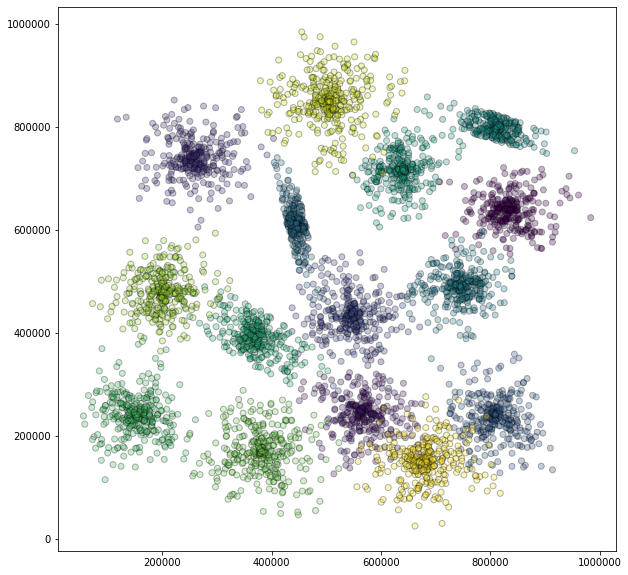

In [13]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [14]:
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [15]:
true_number = 15
less_number = 10
more_number = 20

In [16]:
methods = lambda number_of_clst: [KMeans(n_clusters=number_of_clst, random_state=42, n_jobs=-1),GaussianMixture(n_components=number_of_clst, random_state=42), Birch(n_clusters=number_of_clst), AgglomerativeClustering(n_clusters=number_of_clst)]
names =lambda number_of_clst:  [f'KMeans n_clusters {number_of_clst}', f'GaussianMixture n_clusters {number_of_clst}', f'Birch n_clusters {number_of_clst}', f'AgglomerativeClustering n_clusters {number_of_clst}']

In [17]:
print(f'silhouette_score for true labels: {silhouette_score(points, labels)}') 

silhouette_score for true labels: 0.6088944608894215


In [18]:
for method, name in zip(methods(true_number), names(true_number)):
    labels_pred= method.fit_predict(points)
    sil_sc = silhouette_score(points, labels_pred)
    mi_sc = mutual_info_score(labels, labels_pred)
    print(name)
    print(f'silhouette_score: {sil_sc}')
    print(f'mutual_info_score: {mi_sc}')
    print()

KMeans n_clusters 15
silhouette_score: 0.6261010591793075
mutual_info_score: 2.5595422750555814

GaussianMixture n_clusters 15
silhouette_score: 0.6227272338562463
mutual_info_score: 2.5671662542723

Birch n_clusters 15
silhouette_score: 0.6075939207380119
mutual_info_score: 2.5077832875665407

AgglomerativeClustering n_clusters 15
silhouette_score: 0.6075939207380119
mutual_info_score: 2.5077832875665407



In [19]:
numbers_of_clusters = [10,15,25]
l = len(numbers_of_clusters)

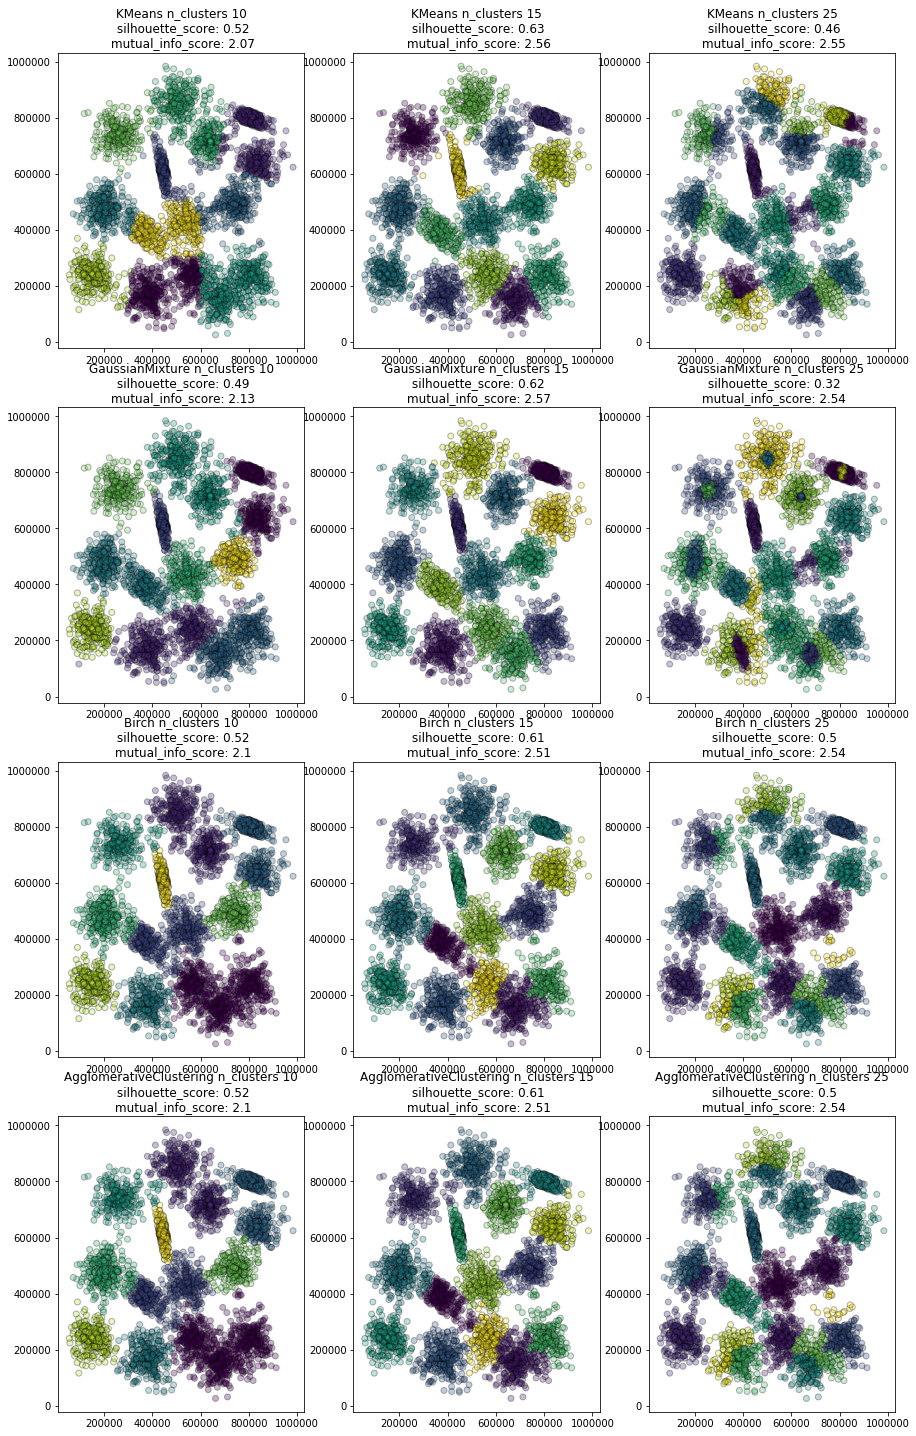

In [20]:
plt.figure(figsize = (15,25))
for ind, clus in enumerate(numbers_of_clusters):
    i=0
    for method, name in zip(methods(clus), names(clus)):
        labels_pred= method.fit_predict(points)
        sil_sc = silhouette_score(points, labels_pred)
        mi_sc = mutual_info_score(labels, labels_pred)
        plt.subplot(4,l,i*l+ind+1)
        plt.scatter(points[:,0], points[:,1], c=labels_pred, alpha=0.3, edgecolor='k')
        plt.title(name + f'\n silhouette_score: {round(sil_sc,2)}' + f'\n mutual_info_score: {round(mi_sc,2)}')
        i+=1
plt.show()

In [21]:
numbers_of_clusters = [5+2*i for i in range(9)]
sil_scores = np.zeros(shape=(4,9))
mi_scores = np.zeros(shape=(4,9))

In [22]:
for ind, clus in enumerate(numbers_of_clusters):
    i=0
    for method, name in zip(methods(clus), names(clus)):
        labels_pred = method.fit_predict(points)
        sil_scores[i][ind] = silhouette_score(points, labels_pred)
        mi_scores[i][ind] = mutual_info_score(labels, labels_pred)
        i+=1

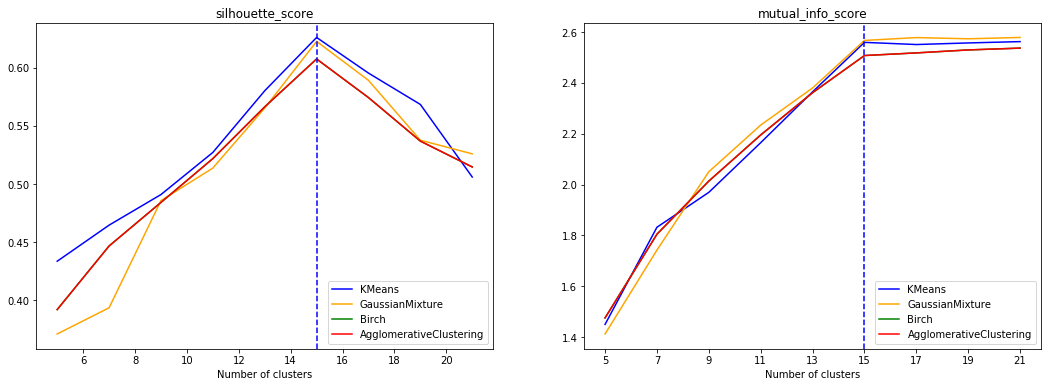

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 6))
ax1.plot(numbers_of_clusters, sil_scores[0], color = 'b', label='KMeans')
ax1.plot(numbers_of_clusters, sil_scores[1], color = 'orange', label='GaussianMixture')
ax1.plot(numbers_of_clusters, sil_scores[2], color = 'g', label='Birch')
ax1.plot(numbers_of_clusters, sil_scores[3], color = 'r', label='AgglomerativeClustering')

ax1.axvline(15, color='b',linestyle='--')
ax1.set_xlabel('Number of clusters')
ax1.set_title("silhouette_score")
ax1.legend(loc=4)

ax2.plot(numbers_of_clusters, mi_scores[0], color = 'b', label='KMeans')
ax2.plot(numbers_of_clusters, mi_scores[1], color = 'orange', label='GaussianMixture')
ax2.plot(numbers_of_clusters, mi_scores[2], color = 'g', label='Birch')
ax2.plot(numbers_of_clusters, mi_scores[3], color = 'r', label='AgglomerativeClustering')

ax2.set_xlabel('Number of clusters')
ax2.set_title("mutual_info_score")
ax2.legend(loc=4)
ax2.axvline(15, color='b',linestyle='--')
ax2.set_xticks(numbers_of_clusters)

plt.show()

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)

For a chosen algorithm find the best number of clusters using bootstrap.

So first based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

In [24]:
points.shape[0]

5000

In [25]:
cluster_ns = range(10,19)
sample_number = 50
from sklearn.utils import resample
from scipy.stats import norm

means = []
inters = []

for i_cn, n_clusters in enumerate(cluster_ns):
    k_means = KMeans(n_clusters=n_clusters)
    scores = []
    for sample_index in range(sample_number):
        k_means = KMeans(n_clusters=n_clusters)
        X = resample(points, n_samples=4000)
        y = k_means.fit_predict(X)
        sil_sc = silhouette_score(X,y)
        scores.append(sil_sc)  
    
    mean = np.mean(np.array(scores))
    var = np.var(np.array(scores))
    inter = norm.interval(alpha=0.95, loc=mean, scale=np.sqrt(var))
    means.append(mean)
    inters.append(inter)
    print('Number of clusters:', n_clusters)
    print('Variance:',  var)
    print('Confidence interval:', (mean-inter, mean+inter))

Number of clusters: 10
Variance: 5.877052071094493e-05
Confidence interval: (array([ 0.01502546, -0.01502546]), array([1.02341914, 1.05347007]))
Number of clusters: 11
Variance: 5.778600833727128e-05
Confidence interval: (array([ 0.01489908, -0.01489908]), array([1.06009913, 1.08989729]))


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(cluster_ns, means, label='Prediction')
plt.fill_between(cluster_ns, np.asarray(inters)[:,0],
                     np.asarray(inters)[:,1], alpha=0.3, label='confidence')
plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.axvline(15, color='b',linestyle='--')
plt.show()

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)

### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the proposed method https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimention estimation or any other convenient for you. For the first case use can use relised code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [26]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sns.set()

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)
not_scaled_data = dg.data

In [28]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [29]:
np.seterr(divide='ignore', invalid='ignore')
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) 
    dist = dist[:, 1:]
   
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) 
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values 
    intdim_k = []
    for k in range(k1, k2 + 1): 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [30]:
np.shape(data)

(1797, 64)

In [31]:
k1 = 2
k2 = 60
nb_iter = 10

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

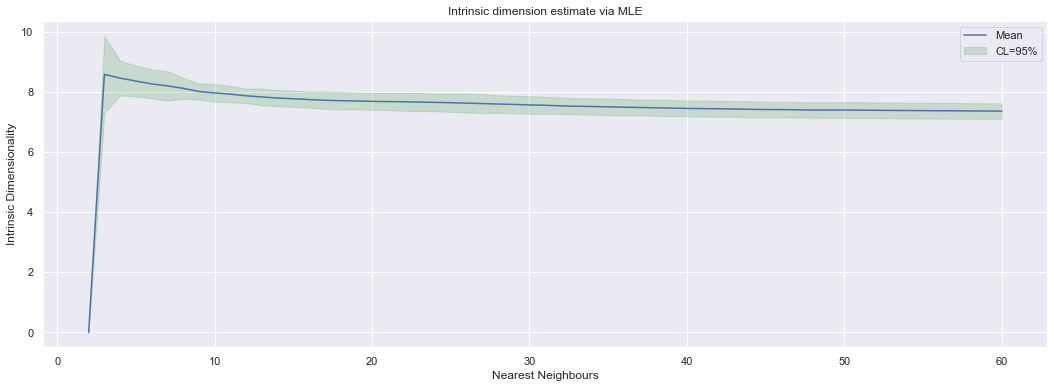

In [32]:
fig = plt.figure(figsize=(18,6))

plt.title("Intrinsic dimension estimate via MLE")
plt.xlabel("Nearest Neighbours")
plt.ylabel("Intrinsic Dimensionality")
plt.grid()
plt.plot(range(k1, k2 + 1), np.mean(intdim_k_repeated, axis=0), 'b',label='Mean')
plt.fill_between(range(k1, k2 + 1), np.mean(intdim_k_repeated, axis=0) + 1.96*np.std(intdim_k_repeated, axis=0),
                     np.mean(intdim_k_repeated, axis=0) - 1.96*np.std(intdim_k_repeated, axis=0), alpha=0.15, 
                 color='green',label='CL=95%')
plt.legend()
plt.grid()
plt.show()

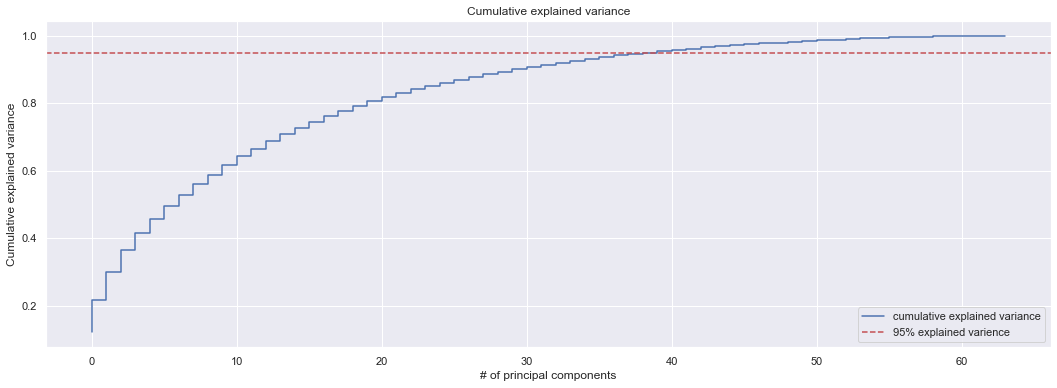

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64).fit(data)
plt.figure(figsize=(18,6))
plt.step(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_), 
         color='b', label='cumulative explained variance')
plt.title('Cumulative explained variance')
plt.xlabel('# of principal components')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.95, label='95% explained varience',c='r', linestyle='--')
plt.legend(loc='lower right')
plt.show()

In [34]:
pca

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
np.shape(data)

(1797, 64)

In [36]:
pca.explained_variance_ratio_*100

array([1.20339161e+01, 9.56105440e+00, 8.44441489e+00, 6.49840791e+00,
       4.86015488e+00, 4.21411987e+00, 3.94208280e+00, 3.38938092e+00,
       2.99822101e+00, 2.93200255e+00, 2.78180546e+00, 2.57705509e+00,
       2.27530332e+00, 2.22717974e+00, 2.16522943e+00, 1.91416661e+00,
       1.77554709e+00, 1.63806927e+00, 1.59646017e+00, 1.48919119e+00,
       1.34796957e+00, 1.27193137e+00, 1.16583735e+00, 1.05764660e+00,
       9.75315947e-01, 9.44558990e-01, 8.63013827e-01, 8.36642854e-01,
       7.97693248e-01, 7.46471371e-01, 7.25582151e-01, 6.91911245e-01,
       6.53908536e-01, 6.40792574e-01, 5.91384112e-01, 5.71162405e-01,
       5.23636803e-01, 4.81807586e-01, 4.53719260e-01, 4.23162753e-01,
       4.06053070e-01, 3.97084808e-01, 3.56493303e-01, 3.40787181e-01,
       3.27835335e-01, 3.11032007e-01, 2.88575294e-01, 2.76489264e-01,
       2.59174941e-01, 2.34483006e-01, 2.18256858e-01, 2.03597635e-01,
       1.95512426e-01, 1.83318499e-01, 1.67946387e-01, 1.61236062e-01,
      

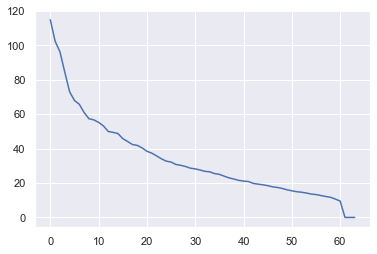

In [37]:
plt.plot(range(len(pca.singular_values_)), pca.singular_values_)
plt.show()

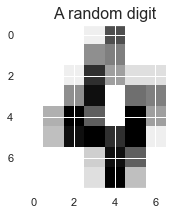

In [38]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

In [39]:
n_of_components = [64,29,21,17,13,9]
digit = 3

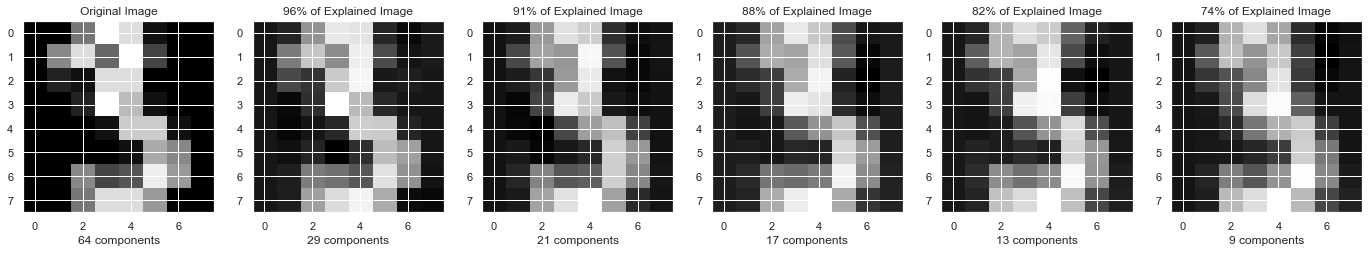

In [40]:
here_data = X

pca = PCA().fit(here_data)
fig, axes = plt.subplots(1, 6, figsize=(24, 4))
cumilative_var = np.cumsum(pca.explained_variance_ratio_)
for i, ax in zip(n_of_components, axes.flat):
    pca = PCA(i).fit(here_data)
    _X = pca.inverse_transform(pca.transform(here_data))
    if i == 64:
        ax.set_title('Original Image')
        ax.set_xlabel('{} components'.format(i))
        ax.imshow(_X[digit].reshape(8, 8),cmap='gray')
    else:
        ax.set_title('{} of Explained Image'.format(str(int(100*cumilative_var[i].round(2)))+'%'))
        ax.set_xlabel('{} components'.format(i))
        ax.imshow(_X[digit].reshape(8, 8),cmap='gray')
        ax.grid(which='major',color='w')

### Task 3.2. (2 points)

Here we will visualise the decompocition, to observe how the data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure the data in whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [41]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [42]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
### BEGIN Solution

pca = PCA(n_components=3)
# ica = FastICA(n_components=3)
# iso = Isomap(n_neighbors=5, n_components=3)

S_pca_ =StandardScaler().fit_transform(pca.fit_transform(data)) 
# S_iso_ =StandardScaler().fit_transform(iso.fit_transform(data)) 
# S_ica_ =StandardScaler().fit_transform(ica.fit_transform(data)) 
### END Solution

In [43]:
data.shape

(1797, 64)

In [44]:
def plot_points(points, title = 'MNIST visualization PCA'):
    digits_3d = pd.DataFrame({
        'x': points[:, 0], 
        'y': points[:, 1], 
        'z': points[:, 2],
        'label': dg['target'],
    })

    colors = cl.scales['10']['qual']['Paired']
    _data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color 
            }
        }
        _data.append(trace)

    layout = go.Layout(
        title=title,
        width=900,
        height=600
    )

    fig = go.Figure(data=_data, layout=layout)

    iplot(fig, show_link = False)

In [45]:
plot_points(S_pca_)

In [ ]:
plot_points(S_ica_, title = 'MNIST visualization ICA')

In [ ]:
plot_points(S_iso_, title = 'MNIST visualization ISO')

In [ ]:
from IPython.display import Image
Image("pca.png")

In [ ]:
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=20000)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
scores = list()

In [ ]:
from sklearn.model_selection import cross_val_score
num_of_components = 8
y = dg.target
X = data

iso = Isomap(n_neighbors = 5, n_components = num_of_components).fit_transform(X)
pca = PCA(n_components = num_of_components).fit_transform(X)
ica = FastICA(n_components = num_of_components).fit_transform(X)

iso_scores = cross_val_score(estimator=logreg, scoring='accuracy', X = iso, y = y, cv = rkf)
pca_scores = cross_val_score(estimator=logreg, scoring='accuracy', X = pca, y = y, cv = rkf)
ica_scores = cross_val_score(estimator=logreg, scoring='accuracy', X = ica, y = y, cv = rkf)

mean_acc = [pca_scores.mean(), ica_scores.mean(), iso_scores.mean()]
std = [pca_scores.std(), ica_scores.std(), iso_scores.std()]

cv_scores = {'dim.reduction method':['PCA', 'ICA', 'Isomap'], 'mean accuracy' : mean_acc, 'std' : std}
pd.DataFrame(data = cv_scores)

In [ ]:
X = data
score = cross_val_score(estimator=logreg, scoring='accuracy', X = X, y = y, cv = rkf)

In [ ]:
score.mean(), score.std()

In [ ]:
from scipy.stats import ttest_ind
value, pvalue = ttest_ind(pca_scores, ica_scores)

print(f"Statistically significant improvement of PCA decomposition over ICA: p-value {pvalue}")

In [ ]:
value, pvalue = ttest_ind(iso_scores, pca_scores)

print(f"Statistically significant improvement of Isomap decomposition over PCA: p-value {pvalue}")

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features with any familiar to you method of Manifold Learning to inclearse the classification accuracy. Use the `KNN` classifier with any hyperparameters your'll choose.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performances on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### BEGIN Solution

# >>> your solution here <<<

In [ ]:
from tqdm import tqdm

In [ ]:
test_scores = []
x_train_sample = x_train
x_test_sample = x_test

In [ ]:
for num_of_components in tqdm(range(10, 350, 10)):
    pca = PCA(n_components=num_of_components)
    clf = KNeighborsClassifier(weights='distance', n_jobs=-1)
    
    _x_train = pca.fit_transform(x_train_sample)
    _x_test = pca.transform(x_test_sample)
    
    clf.fit(_x_train, y_train)
    test_scores.append(clf.score(_x_test, y_test))

In [ ]:
fig = plt.figure(figsize=(18, 6))
plt.plot(range(10, 350, 10), test_scores)
plt.title("Dependence of the test accuracy from the number of components in PCA", size = 16)
plt.xlabel("Number of components", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.axhline(y = 0.93, linestyle='--', label = 'Required accuracy', color = 'r')
plt.legend()
plt.show()

In [ ]:
pca_kmnist = PCA().fit(x_train)
plt.figure(figsize=(18,6))
plt.step(range(pca_kmnist.n_components_),np.cumsum(pca_kmnist.explained_variance_ratio_), 
         color='b', label='cumulative explained variance')
plt.title('Cumulative explained variance')
plt.xlabel('# of principal components')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.95, label='95% explained varience',c='r', linestyle='--')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pca = PCA(n_components=50)
clf = KNeighborsClassifier(weights='distance', n_jobs=-1)

x_train = pca.fit_transform(x_train_sample)
x_test = pca.transform(x_test_sample)

clf.fit(x_train, y_train)
score_50 = clf.score(x_test, y_test)
score_50

In [ ]:
pca = PCA(n_components=300)
clf = KNeighborsClassifier(weights='distance', n_jobs=-1)

x_train = pca.fit_transform(x_train_sample)
x_test = pca.transform(x_test_sample)

clf.fit(x_train, y_train)
score_300 = clf.score(x_test, y_test)
score_300

In [ ]:
clf = KNeighborsClassifier(weights='distance', n_jobs=-1)

x_train = x_train_sample
x_test = x_test_sample

clf.fit(x_train, y_train)
score_full= clf.score(x_test, y_test)
score_full

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Singular values')
plt.plot(range(len(pca_kmnist.singular_values_)), pca_kmnist.singular_values_)
plt.show()

In [ ]:
## Picture for Part 2 

In [ ]:
def plot_points(points, title = 'kMNIST visualization PCA'):
    digits_3d = pd.DataFrame({
        'x': points[:, 0], 
        'y': points[:, 1], 
        'z': points[:, 2],
        'label': y_train,
    })

    colors = cl.scales['10']['qual']['Paired']
    _data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color 
            }
        }
        _data.append(trace)

    layout = go.Layout(
        title=title,
        width=900,
        height=600
    )

    fig = go.Figure(data=_data, layout=layout)

    iplot(fig, show_link = False)

In [ ]:
pca = PCA(n_components=3)
kmist_pca_3 =StandardScaler().fit_transform(pca.fit_transform(x_train_sample)) 

In [ ]:
plot_points(kmist_pca_3, title = 'KMNIST visualization PCA(3)')

#### Voilla! you are done, have a good day ;)